<h1>1. Introduccion</h1>

<h2>1.1 Trasfondo </h2>
Jacksonville es una ciudad ubicada en la costa Atlantica de Florida, la ciudad mas poblada del estado y es la ciudad mas grande por area de los Estados Unidos.Se registra que solo en el 2020 la ciudad tuvo un aumento en su poblacion en unos 4151 habitantes, con un crecimiento anual de su poblacion de casi un 1%.
Ademas, sabemos que cerca de un 40% de la poblacion estadounidense es consumidora entusiasta de la industria alimenticia

<h2>1.2 Problema</h2>
Con los datos anteriores podemos determinar que Jacksonville es un sitio adecuado para instalar un negocio culinario, y el numero de clientes potenciales solo va en aumento. Este proyecto tiene como objetivo determinar cual o cuales serian los sitios indicados para instalar un restaurante.

<h2>1.3 Interes</h2>
El resultado de este proyecto podria ser de interes para cualquier persona que busque establecer un restaurante en esta con grandes posibilidades que es Jacksonville.

<h1>2. Adquisicion de datos y limpieza</h1>

<h2>2.1 Fuentes de datos</h2>
Se utilizaran datos de una pagina web del correo postal de Estados Unidos para extraer datos de los vecindarios de Jacksonville, se obtendran datos geograficos sobre estos vecindarios de la libreria GeoPy de Python, y se utilizara la API de Foursquare para datos de recomendaciones de lugares para todos los vecindarios de Jacksonville y se utilizaran para estudiar los lugares populares de diferentes vecindarios.

<h3> Importando las librerias necesarias</h3>

In [1]:
import geopy
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geocoder
import requests
import sklearn as skl
import folium
import csv
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("Todas las librerias importadas")

Todas las librerias importadas


<h3>Obtencion y limpieza de los datos</h3>

Obtenemos la lista de vecindarios de una pagina web del Estado de Florida y procedemos a procesar los datos en un dataframe

In [2]:
raw_data= "29th and Chase, 45th and Moncrief, Alderman Park, Allendale, Argyle Forest, Arlington, Arlington Hills, Arlington Manor, Arlingwood, Arrowhead, Atlantic Boulevard Estates, Atlantic Highlands, Avondale, Baymeadows, Beach Haven, Beachwood, Beacon Hills and Harbour, Beauclerc, Big Talbot Island, Biltmore, Biscayne, Biscayne Terrace, Black Hammock Island, Blaunt-Quarantine Island, Brackridge, Brentwood, Brierwood, Brooklyn, Broward Islands, Brown Island, Bulls Bay, Carver Manor, Cedar Hills, Cedar Hills Estate, Charter Point, Chimney Lakes, Cisco Gardens, Clifton, Cobblestone, College Gardens, College Park, Colony Cove, Commonwealth, Confederate Point, Copper Hill, Cranzel T Brown Park, Craven, Crystal Springs, Deercreek, Deerwood, Deerwood Center, Del Rio, Dinsmore, Downtown Jacksonville, Duclay, Duclay Forest, Duval, Eagle Bend, East Arlington, East Jacksonville, Eastport, Edgewood, Edgewood Manor, Empire Point, Englewood, Fairfax, Fairfield, Fairways Forest, Forest Trails, Fort Caroline Shores, Fort George Island, Garden City, Gilmore, Girvin, Glynlea - Grove Park, Golden Glades - The Woods, Goodby's Creek, Grand Park, Greenfield Manor, Greenland, Harborview, Herlong, Hidden Hills, Highlands, Hillcrest, Hogan, Hogan's Creek, Holiday Harbors, Holiday Hill, Holly Oaks, Hollyford, Hyde Park, Imeson Park, Isle of Palms, Jacksonville Farms-Terrace, Jacksonville Heights, Jacksonville Heights South, Jacksonville Heights West, Jacksonville Naval Air Station, Jacksonville North Estate, Jacksonville University, Jamestown, Julington Creek, Kennel Club, Kilarney Shores, Lackawanna, Lake Forest, Lake Forest Hills, Lake Lucina, Lakeshore, Lakewood, Larsen, Lincoln Villas, Little Talbot Island, Longbranch, Loretto, Love Grove - Riviera Manor, Magnolia Gardens, Mandarin, Mandarin Station - Losco, Marietta, Mayport, McGirts Creek, Mid-Westside, Midtown, Miramar, Mixon Town, Monclair, Moncrief Park, Monterey, Murray Hill, New Town, Normandy, Normandy Estate, Normandy Manor, Normandy Village, North Beach, Oak Haven, Oak Hill, Oceanway, Ortega, Ortega Farms, Ortega Forest, Ortega Hills, Osceola Forest, Otis, Panama Park, Park Ridge, Pecan Park, Phoenix, Picketville, Pickwick Park, Pumpkin Hill, Regency, Ribault, Riverside, Riverview, Robinson's Addition, Rolling Hills, Royal Lakes, Royal Terrace, San Jose, San Jose Forest, San Marco, San Mateo, Sandalwood, Sans Pareil, Sans Souci, Secret Cove, Settlers Landing, Sherwood Forest, South Riverside, Southpoint, Southside, Southside Estates, Southwood, Spring Glen, Spring Park, Springfield, St. Johns Bluff, St. Nicholas, Sunbeam, Swamp, Sweetwater, Tallulah - North Shore, Tallyrand, The Cape, Tiger Hole-Secret Woods, Turtle Creek, University Club, University Park, Venetia, Wesconnett, Whitehouse, Windy Hill, Woodland Acres, Woodmere, Woodstock"
nbh= raw_data.split(", ")
print(nbh)

['29th and Chase', '45th and Moncrief', 'Alderman Park', 'Allendale', 'Argyle Forest', 'Arlington', 'Arlington Hills', 'Arlington Manor', 'Arlingwood', 'Arrowhead', 'Atlantic Boulevard Estates', 'Atlantic Highlands', 'Avondale', 'Baymeadows', 'Beach Haven', 'Beachwood', 'Beacon Hills and Harbour', 'Beauclerc', 'Big Talbot Island', 'Biltmore', 'Biscayne', 'Biscayne Terrace', 'Black Hammock Island', 'Blaunt-Quarantine Island', 'Brackridge', 'Brentwood', 'Brierwood', 'Brooklyn', 'Broward Islands', 'Brown Island', 'Bulls Bay', 'Carver Manor', 'Cedar Hills', 'Cedar Hills Estate', 'Charter Point', 'Chimney Lakes', 'Cisco Gardens', 'Clifton', 'Cobblestone', 'College Gardens', 'College Park', 'Colony Cove', 'Commonwealth', 'Confederate Point', 'Copper Hill', 'Cranzel T Brown Park', 'Craven', 'Crystal Springs', 'Deercreek', 'Deerwood', 'Deerwood Center', 'Del Rio', 'Dinsmore', 'Downtown Jacksonville', 'Duclay', 'Duclay Forest', 'Duval', 'Eagle Bend', 'East Arlington', 'East Jacksonville', 'East

In [3]:
len(nbh)

198

A continuacion creamos un archivo csv vacio para su posterior uso en el almacenamiento local de nuestra computadora.
Tambien configuramos los parametros deseados de la libreria GeoPy y creamos un loop que obtenga las coordenadas de todos los vecindarios

In [4]:
geolocator= Nominatim(user_agent="http", timeout=None)
lat=[]
long=[]
file_path='C:/Users/edxo/Documents/Geodata.csv'

In [5]:
for i in range(len(nbh)):
    addr= geolocator.geocode('{}, Florida'.format(nbh[i]))
    if addr is None:
        lat.append(None)
        long.append(None)
    else:
        latitude = addr.latitude
        longitude = addr.longitude
        lat.append(latitude)
        long.append(longitude)

A continuacion introducimos las coordenadas en el archivo csv que habiamos creado, de una forma estructurada, para entonces transformarlo en un datafame

In [6]:

with open(file_path,'w')as geonbh:
    fieldnames = ['Neighborhood', 'Latitude', 'Longitude']
    writer = csv.DictWriter(geonbh, fieldnames=fieldnames)
    writer.writerow({'Neighborhood':'Neighborhood', 'Latitude':'Latitude', 'Longitude':'Longitude'})
    for i in range(len(nbh)):
        writer.writerow({'Neighborhood': nbh[i],
                         'Latitude': lat[i],
                         'Longitude': long[i]})
    

In [7]:
df= pd.read_csv(file_path)
df=df.dropna()
df.reset_index(inplace=True)
df

,index,Neighborhood,Latitude,Longitude
0,2,Alderman Park,30.337366,-81.578688
1,3,Allendale,27.806626,-82.644930
2,4,Argyle Forest,30.193851,-81.754820
3,5,Arlington,30.335795,-81.602871
4,6,Arlington Hills,30.347002,-81.583722
...,...,...,...,...
171,193,Whitehouse,30.316350,-81.846215
172,194,Windy Hill,30.274694,-81.542685
173,195,Woodland Acres,29.572258,-81.878014
174,196,Woodmere,27.020614,-82.390651


In [8]:
address= 'Jacksonville, Florida'
locat= geolocator.geocode(address)
latitud = locat.latitude
longit = locat.longitude
print('Las coordenadas geograficas de Jacksonville son {},{}'.format(latitud, longit))

Las coordenadas geograficas de Jacksonville son 30.3321838,-81.655651


In [9]:
map_jsv = folium.Map(location=[latitud, longit], zoom_start= 10 )

Empezamos a crear nuestro mapa con folium y le añadimos los valores de nuestro dataframe para que sean mostrados en el mapa

In [10]:
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label= neighborhood
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=5,
                        popup=label,
                        color='red',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_jsv)
map_jsv

<h2>Usando la API de Foursquare</h2>

Con la API de Foursquare extraeremos los datos de restaurantes en Jacksonville

In [11]:
geolocator= Nominatim(user_agent='foursquare_agent', timeout=None)

In [12]:
headers = {"accept": "application/json", "Authorization":"fsq3xC0DRaMNw4ZRQ8g2Wf/1LszdfXp4lalP9Es49MNbE8w="}
url = 'https://api.foursquare.com/v3/places/nearby'

In [13]:
venues = []

for i in range(176):
    la_data=df.loc[[i], 'Latitude']
    ln_data=df.loc[[i], 'Longitude']
    la_data.astype(float)
    ln_data.astype(float)
    lat=la_data.to_numpy()[0]
    lng=ln_data.to_numpy()[0]
    params={"query":"restaurant","near":"Jacksonville,FL", "ll":"{},{}".format(lat, lng), "radius":"1000", "sort":"DISTANCE"}
    results = requests.request("GET", url, params=params, headers=headers).json()
    for h in range(len(results['results'])):
        try:
            geo=results['results'][h]['geocodes']['main']
            name=results['results'][h]['name']
            categ=results['results'][h]['categories'][0]['name']
            locat=results['results'][h]['location']['locality']
            neighb=results['results'][h]['location']['neighborhood'][0]
            place = [name,categ, geo['latitude'], geo['longitude'], locat, neighb ]
            if place not in venues:
                venues.append(place)
        except KeyError:
            continue
        except IndexError:
            continue
print(len(venues))

310


Ahora con los datos extraidos crearemos un marco de datos para su facil lectura y uso

In [14]:
venues_df= pd.DataFrame(venues, columns=['Venue_name', 'Venue_type', 'Latitude', 'Longitude', 'Location', 'Neighborhood'])
in_jsv=venues_df['Location']=='Jacksonville'
venues_df=venues_df[in_jsv]
venues_df

,Venue_name,Venue_type,Latitude,Longitude,Location,Neighborhood
0,Mikey's Pizza,Pizzeria,30.349719,-81.597171,Jacksonville,Greater Arlington
1,Royal Bar & Restaurant,Bar,30.326505,-81.572384,Jacksonville,Greater Arlington
2,Spices Caribbean Restaurant,Caribbean Restaurant,30.334184,-81.588900,Jacksonville,Greater Arlington
3,Ole Mexican Restaurant,Mexican Restaurant,30.322958,-81.541602,Jacksonville,Greater Arlington
4,Restaurant Depot,Retail,30.266454,-81.622812,Jacksonville,Southside
...,...,...,...,...,...,...
266,Pink Salt Restaurant and Wine Bar,Restaurant,30.311552,-81.660686,Jacksonville,Downtown
267,El Taino Restaurant,Latin American Restaurant,30.278317,-81.601922,Jacksonville,Killarney Shores
268,Jax Karaoke Restaurant,Restaurant,30.278600,-81.603186,Jacksonville,Killarney Shores
269,Buteko Restaurant Sports Bar and Grill,Brazilian Restaurant,30.255554,-81.582670,Jacksonville,Killarney Shores


In [15]:
map_venues = folium.Map(location=[latitud, longit], zoom_start= 10 )

In [16]:
for lat, lng, name in zip(venues_df['Latitude'], venues_df['Longitude'], venues_df['Venue_name']):
    label= name
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=4,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_venues)

Creamos un mapa para visualizar donde se encuentran los restaurantes. Se muestra tambien los nombres de dichos lugares

In [17]:
map_venues

<h3>Analizando los vecindarios</h3>

In [18]:
venues_df.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Venue_name,Venue_type,Latitude,Longitude,Location
0,Avondale,4,4,4,4,4
1,Bayard,1,1,1,1,1
2,Beechwood,4,4,4,4,4
3,Bowden,1,1,1,1,1
4,Brentwood,2,2,2,2,2
5,Brooklyn,2,2,2,2,2
6,Central Civic Core District,3,3,3,3,3
7,Deerwood,2,2,2,2,2
8,Deerwood Club,2,2,2,2,2
9,Downtown,6,6,6,6,6


En la tabla anterior se puede observar la cantidad de restaurantes y similares por vecindario

In [19]:
jsv_onehot = pd.get_dummies(venues_df[['Venue_type']], prefix="", prefix_sep="")
jsv_onehot.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Brazilian Restaurant,Buffet,Burger Joint,Café,Caribbean Restaurant,...,Retail,Sandwich Restaurant,Scandinavian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Thai Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
jsv_onehot['Neighborhood'] = venues_df['Neighborhood']
temp = list(jsv_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
jsv_onehot = jsv_onehot[fixed_columns]
jsv_grouped = jsv_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(jsv_grouped.shape)
jsv_grouped.head(10)

(37, 41)


,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Brazilian Restaurant,Buffet,Burger Joint,Café,...,Retail,Sandwich Restaurant,Scandinavian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Thai Restaurant,Wine Bar
0,Greater Arlington,0.058824,0.235294,0.000000,0.000000,0.058824,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.058824,0.000000
1,Southside,0.000000,0.227273,0.045455,0.000000,0.000000,0.000,0.0,0.045455,0.000000,...,0.045455,0.0,0.0,0.000000,0.00,0.045455,0.0,0.00,0.045455,0.045455
2,Brentwood,0.000000,0.000000,0.000000,0.500000,0.000000,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
3,Hogan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
4,Floral Bluff,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,1.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
5,Westside,0.041667,0.083333,0.041667,0.041667,0.000000,0.000,0.0,0.000000,0.041667,...,0.000000,0.0,0.0,0.083333,0.00,0.000000,0.0,0.00,0.000000,0.000000
6,Killarney Shores,0.125000,0.000000,0.000000,0.125000,0.000000,0.125,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
7,San Pablo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
8,Fort George Island,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
9,Avondale,0.000000,0.000000,0.000000,0.000000,0.250000,0.000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.25,0.000000,0.0,0.25,0.000000,0.000000


Se creo una tabla que contiene la frecuencia de los tipos de restaurantes en cada vecindario, dichos valores estan dados en base a 1, osea se puede llevar a tanto por ciento

In [21]:
la=[]
lo=[]
geolocator= Nominatim(user_agent="google", timeout=None)
for k in range(37):
    address= geolocator.geocode('{},Jacksonville, Florida'.format(jsv_grouped['Neighborhood'][k]))
    if address is None:
        la.append(None)
        lo.append(None)
    else:
        latitude = address.latitude
        longitude = address.longitude
        la.append(latitude)
        lo.append(longitude)

Para entender mejor los datos mostraremos solo los 5 primeros tipos de restaurantes mas frecuentes por vecindario

In [22]:
num_top_venues = 5

for hood in jsv_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jsv_grouped[jsv_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Greater Arlington----
                  venue  freq
0      Asian Restaurant  0.24
1  Caribbean Restaurant  0.12
2            Restaurant  0.12
3              Pizzeria  0.12
4    Mexican Restaurant  0.12


----Southside----
                venue  freq
0    Asian Restaurant  0.23
1  Chinese Restaurant  0.14
2          Restaurant  0.09
3  Italian Restaurant  0.05
4         Coffee Shop  0.05


----Brentwood----
                  venue  freq
0                Bakery   0.5
1  Caribbean Restaurant   0.5
2   American Restaurant   0.0
3                Retail   0.0
4   Lebanese Restaurant   0.0


----Hogan----
                       venue  freq
0         Italian Restaurant   1.0
1           Asian Restaurant   0.0
2  Latin American Restaurant   0.0
3        Lebanese Restaurant   0.0
4                     Lounge   0.0


----Floral Bluff----
                 venue  freq
0         Burger Joint   1.0
1  American Restaurant   0.0
2               Retail   0.0
3  Lebanese Restaurant   0.0
4           

Creemos ahora un dataframe co los top 10 lugares mas frecuentes por vecindario

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['er', 'do', 'er']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Lugar Mas Comun'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}o Lugar Mas Comun'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jsv_grouped['Neighborhood']

for ind in np.arange(jsv_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jsv_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
0,Greater Arlington,Asian Restaurant,Pizzeria,Restaurant,Mexican Restaurant,Caribbean Restaurant,Thai Restaurant,Italian Restaurant,Chinese Restaurant,American Restaurant,Bar
1,Southside,Asian Restaurant,Chinese Restaurant,Restaurant,Wine Bar,Coffee Shop,Thai Restaurant,Italian Restaurant,Latin American Restaurant,Mexican Restaurant,Pizzeria
2,Brentwood,Caribbean Restaurant,Bakery,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
3,Hogan,Italian Restaurant,Grocery Store / Supermarket,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
4,Floral Bluff,Burger Joint,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
5,Westside,Chinese Restaurant,Caribbean Restaurant,Asian Restaurant,Dining and Drinking,Seafood Restaurant,Mexican Restaurant,American Restaurant,Restaurant,Cocktail Bar,Casino
6,Killarney Shores,Latin American Restaurant,American Restaurant,Brazilian Restaurant,Chinese Restaurant,Pizzeria,Restaurant,Bakery,Bar,Buffet,Burger Joint
7,San Pablo,Mediterranean Restaurant,Wine Bar,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
8,Fort George Island,American Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
9,Avondale,Sushi Restaurant,Diner,Southern / Soul Food Restaurant,Bar,Wine Bar,Caribbean Restaurant,Dining and Drinking,Deli,Coffee Shop,Cocktail Bar


A continuacion prepararemos dataframes que hemos usado y los haremos aptos para el uso que se le dara mas adelante

In [25]:
la=[]
lo=[]
geolocator= Nominatim(user_agent="google", timeout=None)
for j in range(37):
    address= geolocator.geocode('{},Jacksonville, Florida'.format(neighborhoods_venues_sorted['Neighborhood'][j]))
    if address is None:
        la.append(None)
        lo.append(None)
    else:
        latitude = address.latitude
        longitude = address.longitude
        la.append(latitude)
        lo.append(longitude)

In [26]:
neighborhoods_venues_sorted.insert(0, 'Latitude', la)
neighborhoods_venues_sorted.insert(0, 'Longitude', lo)

In [27]:
neighborhoods_venues_sorted.dropna(inplace=True)
jsv_grouped.insert(0, 'Latitude', la)
jsv_grouped.insert(0, 'Longitude', lo)
jsv_grouped.dropna(inplace=True)

<h3>Clustering de vecindarios</h3>

Ahora podemos usar el metodo KMeans clustering para agrupar los vecindarios.

Primero necesitamos determinar cunatos clusters usar.

Deifniremos una funcion para visualizar la Silhoutte Score que sera calculada usando diferentes numeros de clusters.

In [28]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Numero de clusters')
    plt.ylabel('Puntuacion de Siluetas')
    plt.title('Comprobando Numero Optimo de Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [29]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = jsv_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df)
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

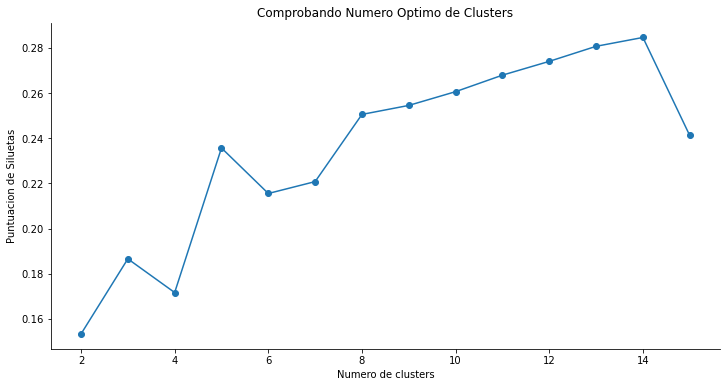

In [30]:
plot(kval, scores)

Usaremos 14 clusters para nuestro modelo de agruacion ya que nos regresa la mayor silhoutte score como nos muestra arriba

In [31]:
k = 14

jsv_clustering = jsv_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(jsv_clustering)
kmeans.labels_.astype('int32')
kmeans

KMeans(n_clusters=14, random_state=40)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Ahora crearemos un dataframe que incluya las etiquetas de los grupos y los top 10 lugares

In [33]:
jsv_merged=neighborhoods_venues_sorted
jsv_merged.reset_index(inplace=True)
jsv_merged

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
0,1,1,-81.558146,30.298296,Southside,Asian Restaurant,Chinese Restaurant,Restaurant,Wine Bar,Coffee Shop,Thai Restaurant,Italian Restaurant,Latin American Restaurant,Mexican Restaurant,Pizzeria
1,2,13,-81.658707,30.359128,Brentwood,Caribbean Restaurant,Bakery,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
2,3,2,-81.581758,30.291351,Hogan,Italian Restaurant,Grocery Store / Supermarket,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
3,4,11,-81.607871,30.343017,Floral Bluff,Burger Joint,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
4,5,1,-81.766661,30.245745,Westside,Chinese Restaurant,Caribbean Restaurant,Asian Restaurant,Dining and Drinking,Seafood Restaurant,Mexican Restaurant,American Restaurant,Restaurant,Cocktail Bar,Casino
5,6,1,-81.565091,30.284685,Killarney Shores,Latin American Restaurant,American Restaurant,Brazilian Restaurant,Chinese Restaurant,Pizzeria,Restaurant,Bakery,Bar,Buffet,Burger Joint
6,7,9,-81.437586,30.295519,San Pablo,Mediterranean Restaurant,Wine Bar,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
7,8,8,-81.429810,30.425795,Fort George Island,American Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
8,9,1,-81.711209,30.304406,Avondale,Sushi Restaurant,Diner,Southern / Soul Food Restaurant,Bar,Wine Bar,Caribbean Restaurant,Dining and Drinking,Deli,Coffee Shop,Cocktail Bar
9,10,4,-81.716209,30.319406,Murray Hill,Bar,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant


<h3>Cluster 1</h3>

In [37]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 0]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
14,15,0,-81.536535,30.229845,Deerwood,Scandinavian Restaurant,Mexican Restaurant,Wine Bar,Caribbean Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
32,35,0,-81.584478,30.464012,First Coast Center,Mexican Restaurant,Wine Bar,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 2</h3>

In [38]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 1]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
0,1,1,-81.558146,30.298296,Southside,Asian Restaurant,Chinese Restaurant,Restaurant,Wine Bar,Coffee Shop,Thai Restaurant,Italian Restaurant,Latin American Restaurant,Mexican Restaurant,Pizzeria
4,5,1,-81.766661,30.245745,Westside,Chinese Restaurant,Caribbean Restaurant,Asian Restaurant,Dining and Drinking,Seafood Restaurant,Mexican Restaurant,American Restaurant,Restaurant,Cocktail Bar,Casino
5,6,1,-81.565091,30.284685,Killarney Shores,Latin American Restaurant,American Restaurant,Brazilian Restaurant,Chinese Restaurant,Pizzeria,Restaurant,Bakery,Bar,Buffet,Burger Joint
8,9,1,-81.711209,30.304406,Avondale,Sushi Restaurant,Diner,Southern / Soul Food Restaurant,Bar,Wine Bar,Caribbean Restaurant,Dining and Drinking,Deli,Coffee Shop,Cocktail Bar
11,12,1,-81.656353,30.326066,Downtown,Restaurant,Café,Seafood Restaurant,Mexican Restaurant,Grocery Store / Supermarket,Bar,Casino,Dining and Drinking,Diner,Deli
12,13,1,-81.686458,30.358666,Fairfax,American Restaurant,Seafood Restaurant,Caribbean Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
13,14,1,-81.549534,30.231074,Deerwood Club,Indian Restaurant,Pizzeria,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
15,16,1,-81.516756,30.291907,Beechwood,American Restaurant,Latin American Restaurant,Coffee Shop,Mexican Restaurant,Casino,Dining and Drinking,Diner,Deli,Cocktail Bar,Chinese Restaurant
16,17,1,-81.598527,30.196538,Goodbys,Fast Food Restaurant,Japanese Restaurant,Lebanese Restaurant,Lounge,Middle Eastern Restaurant,Wine Bar,Diner,Deli,Coffee Shop,Cocktail Bar
18,19,1,-81.555110,30.421515,Northside,American Restaurant,Chinese Restaurant,Caribbean Restaurant,Sandwich Restaurant,Mexican Restaurant,Restaurant,Pizzeria,Sports Bar,Fast Food Restaurant,Brazilian Restaurant


<h3>Cluster 3</h3>

In [39]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 2]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
2,3,2,-81.581758,30.291351,Hogan,Italian Restaurant,Grocery Store / Supermarket,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
17,18,2,-81.631481,30.189685,Plummers,Italian Restaurant,Buffet,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
29,32,2,-81.687320,30.406072,Riverview,Italian Restaurant,Grocery Store / Supermarket,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 4</h3>

In [40]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 3]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
20,23,3,-81.687750,30.328377,Mixon Town,Seafood Restaurant,Wine Bar,Caribbean Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
30,33,3,-81.634816,30.261073,Lakewood,Seafood Restaurant,Wine Bar,Caribbean Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 5</h3>

In [41]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 4]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
9,10,4,-81.716209,30.319406,Murray Hill,Bar,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant


<h3>Cluster 6</h3>

In [42]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 5]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
10,11,5,-81.674541,30.323573,Brooklyn,Restaurant,Cocktail Bar,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Chinese Restaurant,Casino,Caribbean Restaurant
27,30,5,-81.509594,30.268730,North Jacksonville,Restaurant,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino,Caribbean Restaurant
31,34,5,-81.604508,30.244011,Bowden,Restaurant,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino,Caribbean Restaurant


<h3>Cluster 7</h3>

In [43]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 6]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
23,26,6,-81.698988,30.440794,Garden City,BBQ Joint,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant


<h3>Cluster 8</h3>

In [44]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 7]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
22,25,7,-81.615915,30.3137,Empire Point,Steakhouse,Wine Bar,Caribbean Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 9</h3>

In [45]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 8]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
7,8,8,-81.429810,30.425795,Fort George Island,American Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino
24,27,8,-81.535778,30.318287,East Arlington,American Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 10</h3>

In [46]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 9]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
6,7,9,-81.437586,30.295519,San Pablo,Mediterranean Restaurant,Wine Bar,Grocery Store / Supermarket,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 11</h3>

In [47]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 10]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
26,29,10,-81.65343,30.41135,Holly Ford,Café,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant


<h3>Cluster 12</h3>

In [48]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 11]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
3,4,11,-81.607871,30.343017,Floral Bluff,Burger Joint,Wine Bar,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant


<h3>Cluster 13</h3>

In [49]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 12]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
21,24,12,-81.512864,30.143576,Bayard,Fast Food Restaurant,Wine Bar,Thai Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


<h3>Cluster 14</h3>

In [50]:
jsv_merged.loc[jsv_merged['Cluster Labels'] == 13]

,index,Cluster Labels,Longitude,Latitude,Neighborhood,1er Lugar Mas Comun,2do Lugar Mas Comun,3er Lugar Mas Comun,4o Lugar Mas Comun,5o Lugar Mas Comun,6o Lugar Mas Comun,7o Lugar Mas Comun,8o Lugar Mas Comun,9o Lugar Mas Comun,10o Lugar Mas Comun
1,2,13,-81.658707,30.359128,Brentwood,Caribbean Restaurant,Bakery,Casino,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant
19,20,13,-81.662320,30.433572,Northwood,Caribbean Restaurant,Chinese Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Casino
33,36,13,-81.684263,30.312184,Riverside,Caribbean Restaurant,Thai Restaurant,Fast Food Restaurant,Dining and Drinking,Diner,Deli,Coffee Shop,Cocktail Bar,Chinese Restaurant,Casino


Crearemos ahora un mapa para visualizar los grupos

In [53]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(jsv_merged['Latitude'], jsv_merged['Longitude'], jsv_merged['Neighborhood'], jsv_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Resultados y Discusion</h3>

Analizando los 14 grupos obtenidos podemos observar la gran variedad en general de la industria culinaria en Jacksonville. Pero existen grupos donde exite mayor variedad que en otros, los vecindarios de los grupos 1 y 2 tienen la mayor variedad en cuanto a restaurantes, siendo el grupo 2 el de mayor variedad en general, poseyendo desde comida Asiatica, Americana, India, Japonesa, y Pizzerias, solo por nombrar unas pocas.
Mientras, en el resto de grupos exite un tipo de restaurante que predomina en los vecindarios que contienen, habiendo una menor variedad, tenemos por ejemplo el grupo 3 donde predomina la comida italiana, el 9 donde predomina la comida americana y el 14 con comida caribeña.

Podemos entonces ver que los grupos 1 y 2 son los mas aptos para restaurantes en general, mientras que los otros grupos prometen ser una gran competencia si se desea abrir un restaurante similar a los que tienen con frecuencia.

<h3>Conclusiones</h3>

Hemos analizado exitosamente los vecindarios en Jacksonville, Florida, Estados Unidos para determinar cuales serian los mejores lugares para abrir un restaurante. Basados en nuestro analizis, los vecindarios en el grupo 2 tiene la menor concentracion de un mismo tipo de restaurantes que el los otros 13 grupos. Las partes interesadas pueden considerar esta informacion junto con otros factores como transporte, requerimientos legales, y costos asociados. Pero estos temas estaban fuera del alcance de este proyecto y por lo tanto no fueron considerados.

<h4>Nota: Si los mapas no son visibles, le pido gentilmente que los vea en el repositorio de GitHub donde se encuentra este proyecto</h4>


<h2>Muchas Gracias!!</h2>